<a href="https://colab.research.google.com/github/fakhrulnurmulyana/ML_Capstone/blob/main/HukumQ(model_jelek).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers.legacy import SGD
import random

In [ ]:
%%writefile content.json
{"intents":[
    {
      "tag": "sapaan",
      "input": [
        "Halo",
        "Hi",
        "Selamat Pagi",
        "Selamat Siang",
        "Selamat Malam",
        "Salam",
        "Assalamualaikum",
        "Mari kita berbicara",
        "Salam kenal",
        "Hai, kawan!",
        "Hai, sobat!",
        "Salam sejahtera",
        "p",
        "oi",
        "oy",
        "spada"
      ],
      "responses": [
        "Halo",
        "Selamat datang",
        "Apa yang bisa saya bantu?",
        "Ada yang perlu diobrolkan?",
        "Waalaikumusslaam",
        "Mari kita berbicara",
        "Apa kabar, teman?",
        "Salam kenal",
        "Hai",
        "Hai, kawan!",
        "Hai, sobat!",
        "Halo!",
        "Apa yang bisa saya bantu untukmu?"
      ]
    },
    {
      "tag": "pamitan",
      "input": [
        "terima kasih",
        "terimakasih",
        "terimakasih banyak",
        "terima kasih",
        "makasih",
        "dadah",
        "Dah",
        "Daah",
        "adios",
        "okay",
        "oke",
        "Selamat Tinggal",
        "Semoga harimu penuh berkah.",
        "Sukses untukmu!",
        "Hingga kita kembali bertemu.",
        "Terima kasih atas waktu dan perhatiannya.",
        "bye"
      ],
      "responses": [
        "Senang bisa membantu!",
        "Semoga kita bisa berinteraksi lagi di lain waktu.",
        "Sampai jumpa, semoga harimu menyenangkan!",
        "Adios! Hasta luego.",
        "semoga bermanfaat.",
        "yoi",
        "Always",
        "bye",
        "dadah",
        "bye, hiks"
      ]
    },
    {
      "tag": "hukumq",
      "input": [
        "apa itu HukumQ ?",
        "Apa yang dimaksud dengan HukumQ?",
        "Bisakah Anda menjelaskan apa itu HukumQ?",
        "HukumQ itu apa?",
        "Apa definisi HukumQ?",
        "Apa HukumQ?",
        "HukumQ",
        "HukumQ apa?",
        "HukumQ arti",
        "Arti HukumQ",
        "Apa HukumQ",
        "HukumQ itu seperti apa?",
        "Tolong jelaskan istilah HukumQ.",
        "Apakah Anda bisa memberikan definisi singkat tentang HukumQ?",
        "Jelaskan HukumQ",
        "Jelaskan apa itu HukumQ"
      ],
      "responses": [
        "HukumQ adalah aplikasi yang memberikan jawaban terkait pertanyaan hukum tertulis di Indonesia.",
        "HukumQ adalah aplikasi yang fokus memberikan jawaban terkait pertanyaan hukum tertulis di Indonesia",
        "Hmm, terdengar seperti nama saya. Kalo benar berarti itu adalah aplikasi chatbot yang dibuat oleh peserta Kampus Merdeka Bangkit 2023 batch 2. aplikasi ini dibuat agar bisa menjelaskan hukum tertulis di indonesia.",
        "HukumQ adalah aplikasi yang bisa menjawab pertanyaan tentang hukum tertulis di indonesia. Belum semua hukum tertulis sih, hanya sebagian pada bidang yang kecil, karena saya masih dalam versi pengembangan."
      ]
    },
    {
      "tag": "siapa",
      "input": [
        "Kamu siapa ?",
        "Bisa kenalan nggak?",
        "Identitas kamu apa?",
        "Boleh tahu siapa kamu?",
        "Kamu punya nama?",
        "Sebutkan siapa diri kamu.",
        "Siapakah yang sedang berbicara?",
        "Apakah kamu bisa memperkenalkan diri?",
        "Nama panggilan kamu apa?",
        "Siapa yang,sedang online di sini?",
        "Tolong perkenalkan dirimu.",
        "Nama?",
        "siapa?",
        "Nama mu",
        "NamaMu"
      ],
      "responses": [
        "Saya adalah HukumQ",
        "aplikasi yang dibangun untuk membantu memahami hukum tertulis tertulis di indonesia, HukumQ",
        "Saya merupakan HukumQ",
        "HukumQ, platform untuk menjawab pertanyaan seputar hukum di Indonesia.",
        "HukumQ di sini",
        "HukumQ hadir untuk mempermudah pemahaman hukum tertulis di Indonesia.",
        "Saya adalah HukumQ, solusi untuk pertanyaan-pertanyaan hukum Anda.",
        "HukumQ hadir sebagai panduan hukum online di Indonesia.",
        "Saya adalah HukumQ, platform pintar untuk memahami peraturan hukum di Indonesia.",
        "HukumQ di sini untuk menjawab pertanyaan hukum Anda",
        "Saya adalah HukumQ, sahabat untuk menjelaskan hukum tertulis Indonesia.",
        "HukumQ",
        "Chatbot HukumQ",
        "Sebenarnya nama saya adalah HukumQ, tapi mungkin dalam konteks chat ini lebih tepat HukumMU deh"
      ]
    },
    {
      "tag": "fallback",
      "input": ["*"],
      "responses": ["Maaf, saya tidak dapat memahami pertanyaan Anda. Bisakah Anda mencoba pertanyaan lain?"]
    },
    { "tag": "definisi_praperadilan",
        "input": [
          "Apa itu Praperadilan?",
          "Definisi Praperadilan"
        ],
        "responses": [
          "Praperadilan adalah proses hukum yang memberikan wewenang kepada pengadilan untuk memeriksa keabsahan suatu penangkapan, penahanan, penghentian penyidikan, atau penghentian penuntutan sebelum kasus itu diajukan ke pengadilan pidana.",
          "Tujuan Praperadilan adalah melindungi hak asasi manusia dan memastikan bahwa tindakan penegak hukum sesuai dengan ketentuan hukum yang berlaku."
        ]
      },
      {
        "tag": "Siapa_Berhak_Praperadilan",
        "input": [
          "Siapa yang berhak mengajukan Praperadilan?",
          "Proses pengajuan Praperadilan"
        ],
        "responses": [
          "Siapa pun yang merasa hak-haknya dilanggar, termasuk tersangka, terdakwa, atau pihak yang dirugikan, dapat mengajukan Praperadilan.",
          "Proses pengajuan Praperadilan dimulai dengan mengajukan permohonan ke pengadilan yang berwenang sesuai dengan peraturan perundang-undangan yang berlaku."
        ]
      },
      {
        "tag": "wewenang_praperadilan",
        "input": [
            "Wewenang pengadilan negeri dalam Praperadilan",
            "Bagian Kesatu Praperadilan",
            "Pasal 77 KUHAP"
        ],
        "responses": [
          "Pengadilan negeri berwenang untuk memeriksa dan memutus tentang:",
          "- Sah atau tidaknya penangkapan, penahanan, penghentian penyidikan, atau penghentian penuntutan.",
          "- Ganti kerugian dan atau rehabilitasi bagi seorang yang perkara pidananya dihentikan pada tingkat penyidikan atau penuntutan."
        ]
      },
      {
        "tag": "pelaksanaan_wewenang_pasal_78",
        "input": ["Pelaksanaan wewenang pengadilan negeri"],
        "responses": [
          "(1) Praperadilan dipimpin oleh hakim tunggal yang ditunjuk oleh ketua pengadilan negeri dan dibantu oleh seorang panitera.",
          "(2) Yang melaksanakan wewenang pengadilan negeri sebagaimana dimaksud dalam Pasal 77 adalah praperadilan."
        ]
      },
      {
        "tag": "Permintaan_Pemeriksaan_Pasal_79",
        "input": ["Permintaan pemeriksaan menurut Pasal 79"],
        "responses": [
          "Permintaan pemeriksaan tentang sah atau tidaknya suatu penangkapan atau penahanan diajukan oleh tersangka, keluarga, atau kuasanya kepada ketua pengadilan negeri dengan menyebutkan alasannya."
        ]
      },
      {
        "tag": "Permintaan_Pemeriksaan_Pasal_80",
        "input": ["Permintaan pemeriksaan menurut Pasal 80"],
        "responses": [
          "Permintaan untuk memeriksa sah atau tidaknya suatu penghentian penyidikan atau penuntutan dapat diajukan oleh penyidik, penuntut umum, atau pihak ketiga yang berkepentingan kepada ketua pengadilan negeri dengan menyebutkan alasannya."
        ]
      },
      {
        "tag": "Permintaan_Pemeriksaan_Pasal_81",
        "input": ["Permintaan pemeriksaan menurut Pasal 81"],
        "responses": [
          "Permintaan ganti kerugian dan atau rehabilitasi akibat tidak sahnya penangkapan atau penahanan, atau akibat sahnya penghentian penyidikan atau penuntutan diajukan oleh tersangka atau pihak ketiga yang berkepentingan kepada ketua pengadilan negeri dengan menyebut alasannya."
        ]
      },
      {
        "tag": "Proses_Pemeriksaan_Pasal_82",
        "input": ["Proses pemeriksaan praperadilan menurut Pasal 82"],
        "responses": [
          "(1) Acara pemeriksaan praperadilan untuk hal sebagaimana dimaksud dalam Pasal 79, Pasal 80 dan Pasal 81 ditentukan sebagai berikut:",
          "a. Dalam waktu tiga hari setelah diterimanya permintaan, hakim yang ditunjuk menetapkan hari sidang;",
          "b. Dalam memeriksa dan memutus tentang sah atau tidaknya penangkapan atau penahanan, sah atau tidaknya penghentian penyidikan atau penuntutan; permintaan ganti kerugian dan atau rehabilitasi akibat tidak sahnya penangkapan atau penahanan, akibat sahnya penghentian penyidikan atau penuntutan dan ada benda yang disita yang tidak termasuk alat pembuktian, hakim mendengar keterangan baik dan tersangka atau pemohon maupun dan pejabat yang berwenang;",
          "c. Pemeriksaan tersebut dilakukan cara cepat dan selambat-lambatnya tujuh hari hakim harus sudah menjatuhkan putusannya;",
          "d. Dalam hal suatu perkara sudah mulai diperiksa oleh pengadilan negeri sedangkan pemeriksaan mengenai permintaan kepada praperadilan belum selesai, maka permintaan tersebut gugur;",
          "e. Putusan praperadilan pada tingkat penyidikan tidak menutup kemungkinan untuk mengadakan pemeriksaan praperadilan lagi pada tingkat pemeriksaan oleh penuntut umum, jika untuk itu diajukan permintaan baru.",
          "(2) Putusan hakim dalam acara pemeriksaan praperadilan mengenai hal sebagaimana dimaksud dalam Pasal 79, Pasal 80 dan Pasal 81, harus memuat dengan jelas dasar dan alasannya.",
          "(3) Isi putusan selain memuat ketentuan sebagaimana dimaksud dalam ayat (2) juga memuat hal sebagai berikut",
          "a. Dalam hal putusan menetapkan bahwa sesuatu penangkapan atau penahanan tidak sah; maka penyidik atau jaksa penuntut umum pada tingkat pemeriksaan masing-masing harus segera membebaskan tersangka;",
          "b. Dalam hal putusan menetapkan bahwa sesuatu penghentian penyidikan atau penuntutan tidak sah, penyidikan atau penuntutan terhadap tersangka wajib dilanjutkan;",
          "c. Dalam hal putusan menetapkan bahwa suatu penangkapan atau penahanan tidak sah, maka dalam putusan dicantumkan jumlah besarnya ganti kerugian dan rehabilitasi yang diberikan, sedangkan dalam hal suatu penghentian penyidikan atau penuntutan adalah sah dan tersangkanya tidak ditahan, maka dalam putusan dicantumkan rehabilitasinya;",
          "d. Dalam hal putusan menetapkan bahwa benda yang disita ada yang tidak termasuk alat pembuktian, maka dalam putusan dicantumkan bahwa benda tersebut harus segera dikembalikan kepada tersangka atau dan siapa benda itu disita.",
          "(4) Ganti kerugian dapat diminta, yang meliputi hal sebagaimana dimaksud dalam Pasal 77 dan Pasal 95."
        ]
      },
      {
        "tag": "Banding_Putusan_Pasal_83",
        "input": ["Banding terhadap putusan praperadilan menurut Pasal 83"],
        "responses": [
          "(1) Terhadap putusan praperadilan dalam hal sebagaimana dimaksud dalam Pasal 79, Pasal 80, dan Pasal 81 tidak dapat dimintakan banding.",
          "(2) Dikecualikan dari ketentuan ayat (1) adalah putusan praperadilan yang menetapkan tidak sahnya penghentian penyidikan atau penuntutan yang untuk itu dapat dimintakan putusan akhir ke pengadilan tinggi dalam daerah hukum yang bersangkutan."
        ]
      }
  ]
}


Overwriting content.json


In [ ]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('content.json',encoding='utf-8').read()
intents = json.loads(data_file)

In [ ]:
  >>> import nltk
  >>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
for intent in intents['intents']:
    for pattern in intent['input']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
  >>> import nltk
  >>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

78 documents
14 classes ['Banding_Putusan_Pasal_83', 'Permintaan_Pemeriksaan_Pasal_79', 'Permintaan_Pemeriksaan_Pasal_80', 'Permintaan_Pemeriksaan_Pasal_81', 'Proses_Pemeriksaan_Pasal_82', 'Siapa_Berhak_Praperadilan', 'definisi_praperadilan', 'fallback', 'hukumq', 'pamitan', 'pelaksanaan_wewenang_pasal_78', 'sapaan', 'siapa', 'wewenang_praperadilan']
117 unique lemmatized words ['*', ',', '.', '77', '79', '80', '81', '82', '83', 'adios', 'anda', 'apa', 'apakah', 'arti', 'assalamualaikum', 'atas', 'bagian', 'banding', 'banyak', 'berbicara', 'berhak', 'berkah', 'bertemu', 'bisa', 'bisakah', 'boleh', 'bye', 'daah', 'dadah', 'dah', 'dalam', 'dan', 'definisi', 'dengan', 'di', 'dimaksud', 'diri', 'dirimu', 'hai', 'halo', 'harimu', 'hi', 'hingga', 'hukumq', 'identitas', 'istilah', 'itu', 'jelaskan', 'kamu', 'kasih', 'kawan', 'kembali', 'kenal', 'kenalan', 'kesatu', 'kita', 'kuhap', 'makasih', 'malam', 'mari', 'memberikan', 'memperkenalkan', 'mengajukan', 'menjelaskan', 'menurut', 'mu', 'nama'

In [ ]:
pickle.dump(words,open('texts.pkl','wb'))
pickle.dump(classes,open('labels.pkl','wb'))

In [ ]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
X = list(training[:,0])
Y = list(training[:,1])

<ipython-input-9-346a66662082>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print("Training data created")

Training data created


In [ ]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.015, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])


In [ ]:
#fitting and saving the model
history = model.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=32, verbose=1, validation_data=(X_test, y_test))
model.save('model.h5', history)

print(history.history.keys())

Epoch 1/200
2/2 [==============================] - 3s 969ms/step - loss: 2.6802 - accuracy: 0.0204 - val_loss: 2.6796 - val_accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 142ms/step - loss: 2.7058 - accuracy: 0.0204 - val_loss: 2.6501 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 136ms/step - loss: 2.6321 - accuracy: 0.0816 - val_loss: 2.6125 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 110ms/step - loss: 2.5959 - accuracy: 0.1633 - val_loss: 2.5714 - val_accuracy: 0.0000e+00
Epoch 5/200
2/2 [==============================] - 0s 274ms/step - loss: 2.5329 - accuracy: 0.2857 - val_loss: 2.5261 - val_accuracy: 0.0000e+00
Epoch 6/200
2/2 [==============================] - 0s 148ms/step - loss: 2.4929 - accuracy: 0.2857 - val_loss: 2.4810 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 0s 122ms/step - loss: 2.3982 - accuracy: 0.3469 - val_loss: 2.4326 - val_accura

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


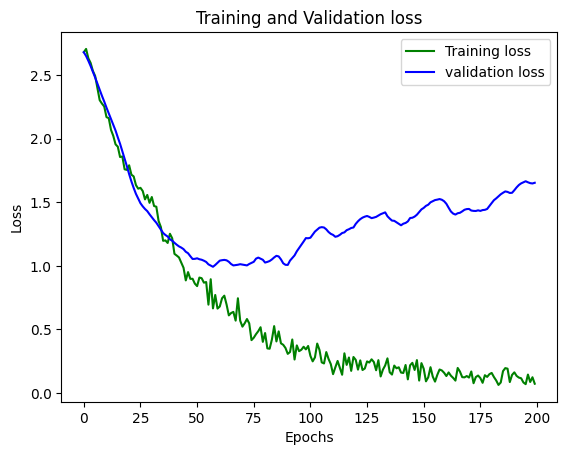

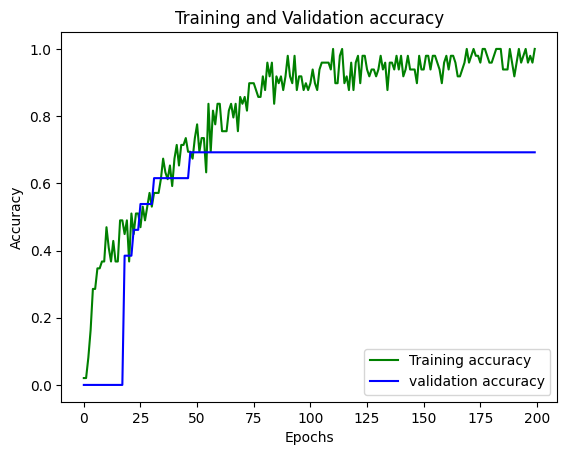

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               15104     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 14)                910       
                                                                 
Total params: 24270 (94.80 KB)
Trainable params: 24270 (94.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
model created


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(200)
%matplotlib inline
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(200)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.summary()

print("model created")